# **Overview:**

Chương trình này là tiếp nối của chương trình Part-2_Visualization.ipynb

Chương trình là thử nghiệm các mô hình Machine Learning trên tập dữ liệu đã được xử lý cũng như có cái nhìn tổng quan từ 2 phần trước.

# **6. Khai báo và cài đặt cần sử dụng**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold
from datetime import datetime
import warnings

In [2]:
from pylab import rcParams

rcParams['figure.figsize'] = 16,9

### **Đọc dữ liệu**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Credit_Scoring/Test/13.12/data_filled.csv')

In [4]:
df

,Unnamed: 0,LoanBriefID,LoanAmount,LoanTime,IsReMarketing,ProvinceId,Gender,Age,JobId,ImcomeType,IsMerried,NumberBaby,RelationshipType,LivingWith,RateTypeId,ProductId,ResidentType,LoanAmountExpertiseAI,NumberCall,score,label_result
0,0,1095199,30000000,12,0,1,0.0,31,123.0,1.0,1.0,1.0,1.0,1.0,10,5,6,48800000.0,0.0,1.0,True
1,1,950035,12000000,6,1,1,0.0,30,123.0,5.0,1.0,2.0,1.0,3.0,10,2,4,13600000.0,1.0,0.6,False
2,2,975972,10000000,9,1,1,0.0,29,123.0,1.0,1.0,1.0,1.0,2.0,10,5,4,24000000.0,1.0,0.9,True
3,3,943144,5000000,9,1,79,0.0,25,123.0,5.0,0.0,0.0,2.0,1.0,10,2,4,0.0,8.0,0.9,True
4,4,1015972,16000000,9,0,1,0.0,28,123.0,1.0,0.0,1.0,15.0,0.0,10,2,7,24100000.0,0.0,0.4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,10195,1801710,12000000,12,0,26,0.0,35,123.0,5.0,1.0,2.0,1.0,0.0,13,2,14,17900000.0,0.0,0.9,True
10196,10196,1803670,10000000,12,0,1,0.0,34,126.0,1.0,1.0,3.0,9.0,1.0,13,5,14,28050000.0,0.0,0.9,True
10197,10197,1800734,10000000,12,0,79,0.0,31,123.0,1.0,0.0,0.0,4.0,0.0,13,2,14,33400000.0,0.0,0.9,True
10198,10198,1751348,7000000,12,0,1,0.0,35,126.0,1.0,1.0,2.0,1.0,2.0,13,2,15,10300000.0,0.0,0.7,True


**Kiểm tra độ quan trọng của đăc trưng (feature important)**

In [5]:
df.columns

Index(['Unnamed: 0', 'LoanBriefID', 'LoanAmount', 'LoanTime', 'IsReMarketing',
       'ProvinceId', 'Gender', 'Age', 'JobId', 'ImcomeType', 'IsMerried',
       'NumberBaby', 'RelationshipType', 'LivingWith', 'RateTypeId',
       'ProductId', 'ResidentType', 'LoanAmountExpertiseAI', 'NumberCall',
       'score', 'label_result'],
      dtype='object')

In [6]:
features = ['LoanAmount', 'LoanTime', 'IsReMarketing',
       'ProvinceId', 'Gender', 'Age', 'JobId', 'ImcomeType', 'IsMerried',
       'NumberBaby', 'RelationshipType', 'LivingWith', 'RateTypeId',
       'ProductId', 'ResidentType', 'LoanAmountExpertiseAI', 'NumberCall']

In [7]:
X = df[features]
Y = df['label_result']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=12)

In [9]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [10]:
rf.feature_importances_

array([0.07422555, 0.10756273, 0.0173978 , 0.02632028, 0.01910837,
       0.13050821, 0.16578726, 0.02558378, 0.01475779, 0.02488543,
       0.0725458 , 0.03791939, 0.00536235, 0.02058427, 0.03968201,
       0.17059424, 0.04717474])

<BarContainer object of 17 artists>

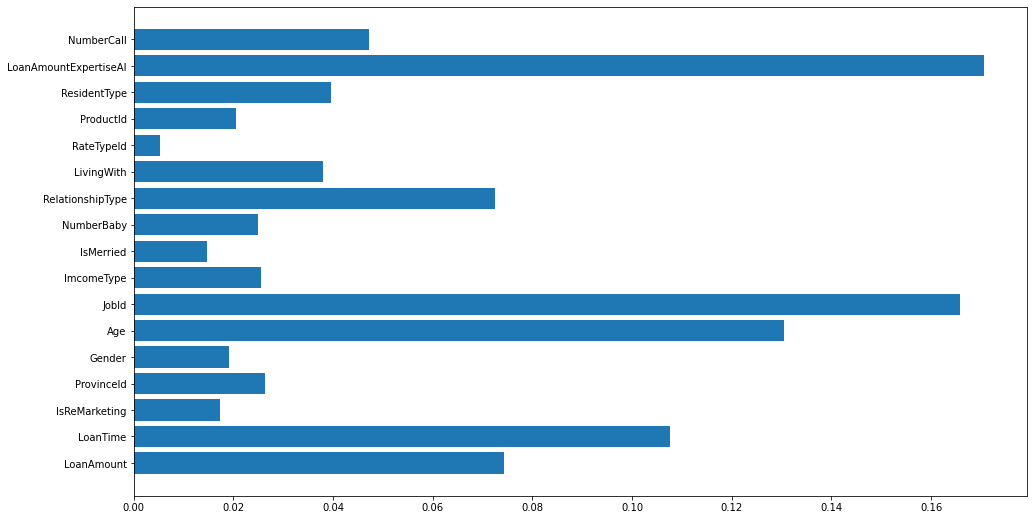

In [11]:
plt.barh(features, rf.feature_importances_)

# **7. Huấn luyện mô hình - Classification**

**Split dataset**

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [14]:
print('Kích thước tập huấn luyện: ', X_train.shape, y_train.shape)
print('Kích thước tập kiểm tra: ', X_test.shape, y_test.shape)

Kích thước tập huấn luyện:  (7140, 17) (7140,)
Kích thước tập kiểm tra:  (3060, 17) (3060,)


In [15]:
# Hàm tính độ chính xác, ma trận nhầm lẫn, Recall, precision, f1 score và vẽ đồ thị ROC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
def evaluate_model(model, X_test, y_test, y_prediction):
  print("Các chỉ số đánh giá mức độ hiệu quả của mô hình: ")
  #Accuracy
  print("1. Accuracy:",metrics.accuracy_score(y_prediction,y_test))
  # confusion_matrix
  print('2. confusion_matrix:')
  print(confusion_matrix(y_prediction,y_test))
  # recall_score
  print('3. recall_score: ', recall_score(y_prediction,y_test))
  # precision_score
  print('4. precision_score: ', precision_score(y_prediction,y_test))
  # f1_score
  print('5. f1_score: ', f1_score(y_prediction,y_test))
  # ROC plot
  print('6. Biểu đồ ROC của mô hình:')
  metrics.plot_roc_curve(model, X_test, y_test)
  plt.show()

**Logistic Regression**

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.819281045751634
2. confusion_matrix:
[[   0    0]
 [ 553 2507]]
3. recall_score:  0.819281045751634
4. precision_score:  1.0
5. f1_score:  0.9006646308604275
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


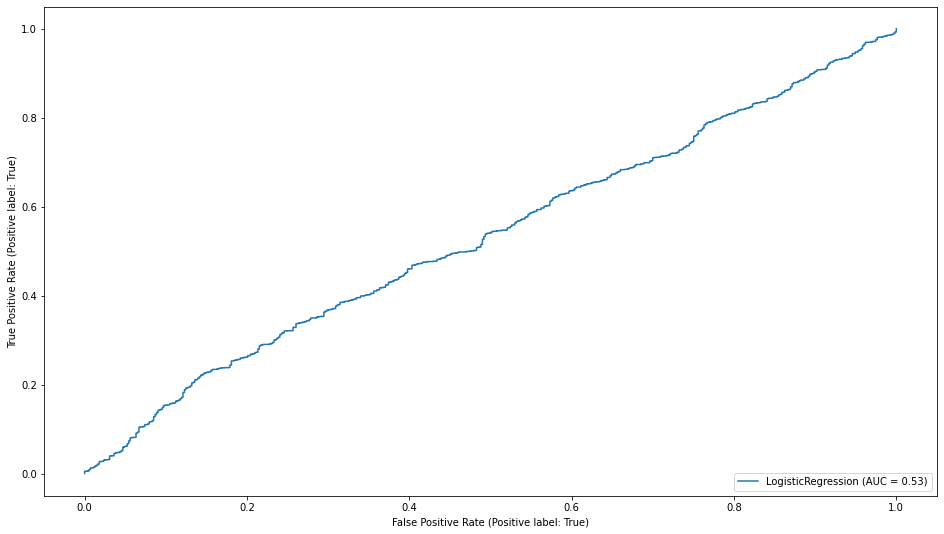

In [16]:
#Given smote, we have to do a little adjustment
X_train, X_dev, Y_train, Y_dev = train_test_split(X_train, y_train, test_size=0.30, random_state=123)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression(fit_intercept=True, penalty='l2')
logreg.fit(X_train, Y_train)

logregprediction=logreg.predict(X_test)

evaluate_model (logreg, X_test, y_test, logregprediction)
# #evaluation(Accuracy)
# print("Logistic Regression Accuracy:",metrics.accuracy_score(logregprediction,y_test))
# # confusion_matrix
# print('confusion_matrix:')
# print(confusion_matrix(logregprediction,y_test))
# # recall_score
# print('recall_score: ', recall_score(logregprediction,y_test))
# # precision_score
# print('precision_score: ', precision_score(logregprediction,y_test))
# # f1_score
# print('f1_score: ', f1_score(logregprediction,y_test))
# # ROC plot
# metrics.plot_roc_curve(logreg, X_test, y_test)
# plt.show()

In [17]:
logregprediction

array([ True,  True,  True, ...,  True,  True,  True])

In [18]:
type(logregprediction)

numpy.ndarray

In [19]:
logregprediction[0]

True

In [20]:
type(logregprediction[0])

numpy.bool_

Nhận xét: Mô hình LR không dự báo tốt trong bài toàn này! Do mô hình đã dự báo tất cả nhãn là True!!!

**Linear Discriminant Analysis**

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.8199346405228758
2. confusion_matrix:
[[  75   73]
 [ 478 2434]]
3. recall_score:  0.8358516483516484
4. precision_score:  0.9708815317112086
5. f1_score:  0.8983207233806976
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


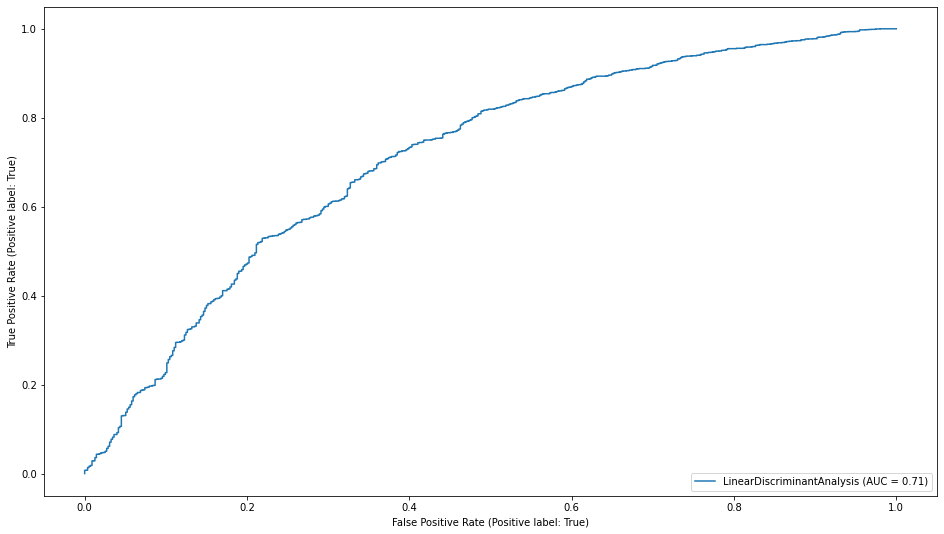

In [22]:

#Given smote, we have to do a little adjustment
X_train, X_dev, Y_train, Y_dev = train_test_split(X_train, y_train, test_size=0.3, random_state=123)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
lda.fit(X_train, Y_train)

lda_prediction=lda.predict(X_test)

evaluate_model (lda, X_test, y_test, lda_prediction)

**Gaussian Naive Bayes**

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.819281045751634
2. confusion_matrix:
[[   0    0]
 [ 553 2507]]
3. recall_score:  0.819281045751634
4. precision_score:  1.0
5. f1_score:  0.9006646308604275
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


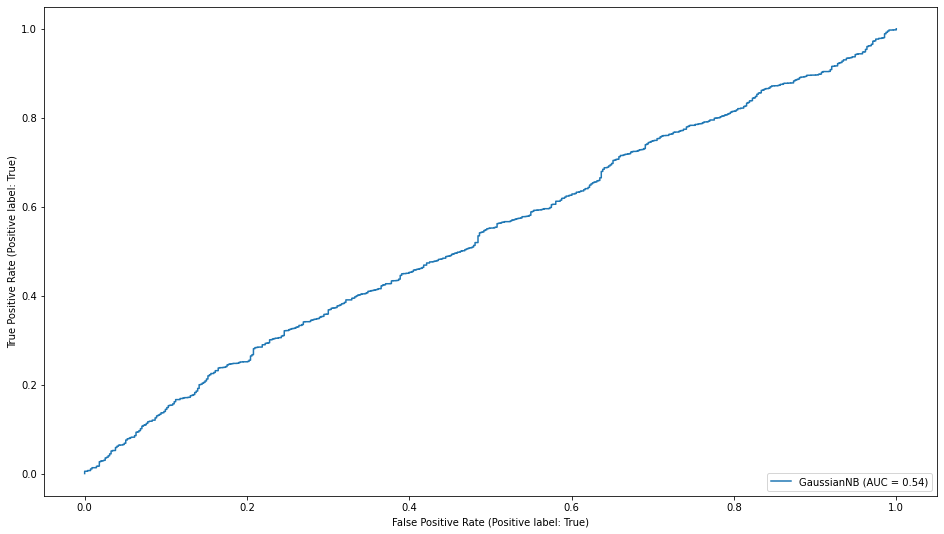

In [24]:
#Given smote, we have to do a little adjustment
X_train, X_dev, Y_train, Y_dev = train_test_split(X_train, y_train, test_size=0.20, random_state=123)


from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

gnbprediction=gnb.predict(X_test)

evaluate_model (gnb, X_test, y_test, gnbprediction)



**Decision Tree Classifier**

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.7480392156862745
2. confusion_matrix:
[[ 204  422]
 [ 349 2085]]
3. recall_score:  0.8566146261298274
4. precision_score:  0.8316713203031512
5. f1_score:  0.8439587128111717
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


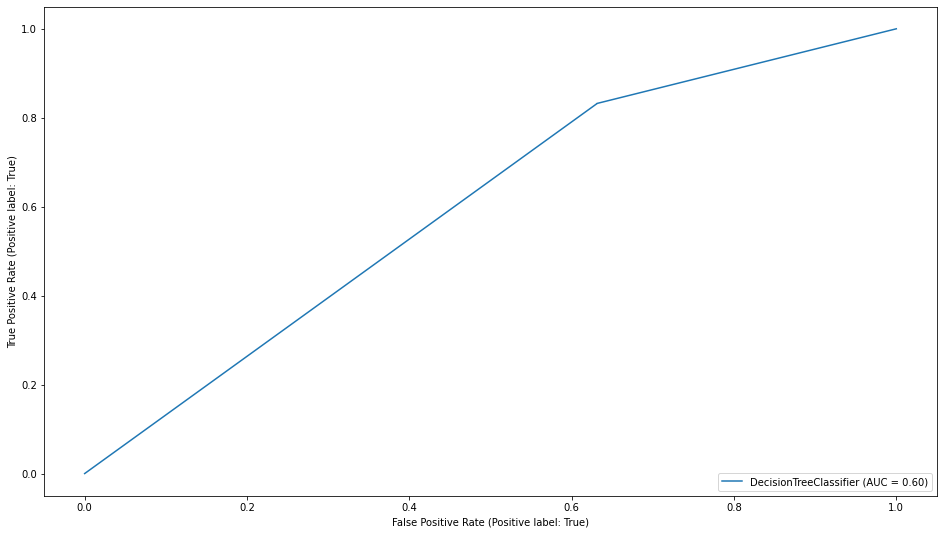

In [26]:
#remember becaus of the new data after imbalance adjustment, we use the following
X_train, X_dev, Y_train, Y_dev = train_test_split(X_train, y_train, test_size=0.20, random_state=0)

#importing module
from sklearn.tree import DecisionTreeClassifier
#making the instance
dtc= DecisionTreeClassifier(random_state=1234)
#learning
dtc.fit(X_train,Y_train)
#Prediction
dtcprediction=dtc.predict(X_test)

evaluate_model (dtc, X_test, y_test, dtcprediction)


**Random Forest Classifier**

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.8444444444444444
2. confusion_matrix:
[[ 186  109]
 [ 367 2398]]
3. recall_score:  0.8672694394213382
4. precision_score:  0.9565217391304348
5. f1_score:  0.9097116843702581
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


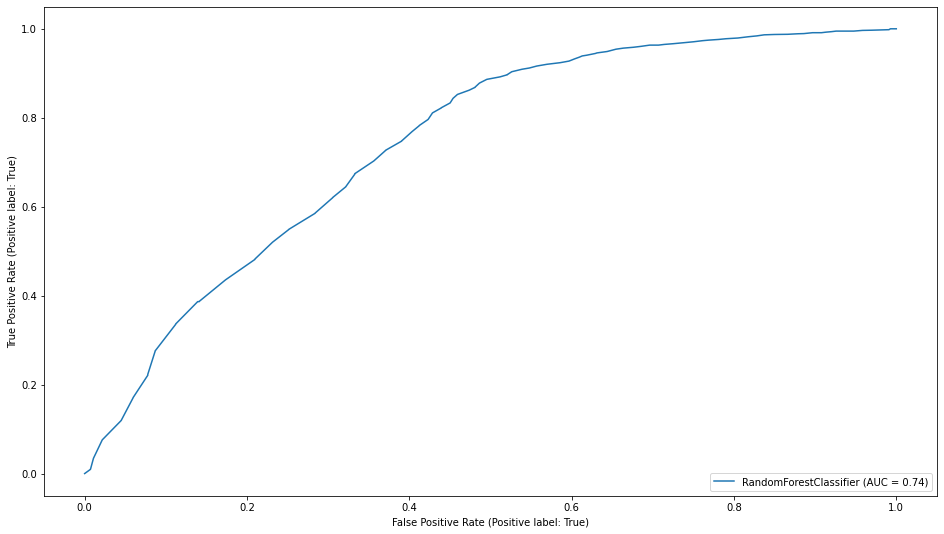

In [28]:
#remember becaus of the new data after imbalance adjustment, we use the following
X_train, X_dev, Y_train, Y_dev = train_test_split(X_train, y_train, test_size=0.20, random_state=0)

#importing module
from sklearn.ensemble import RandomForestClassifier
#making the instance
rfc=RandomForestClassifier(n_jobs=-1,random_state=123)
#learning
rfc.fit(X_train,Y_train)
#Prediction
rfcprediction=rfc.predict(X_test)

evaluate_model (rfc, X_test, y_test, rfcprediction)


**SVM Classifier**

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.819281045751634
2. confusion_matrix:
[[   0    0]
 [ 553 2507]]
3. recall_score:  0.819281045751634
4. precision_score:  1.0
5. f1_score:  0.9006646308604275
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


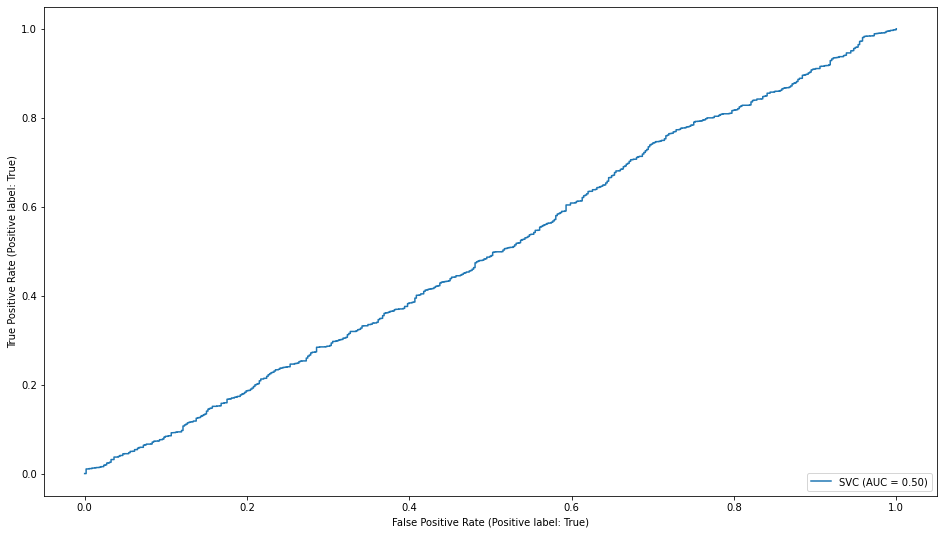

In [30]:
#remember becaus of the new data after imbalance adjustment, we use the following
X_train, X_dev, Y_train, Y_dev = train_test_split(X_train, y_train, test_size=0.20, random_state=0)

#importing module
from sklearn import svm
#making the instance
svc = svm.SVC(random_state=123)
#learning
svc.fit(X_train,Y_train)
#Prediction
svcprediction=svc.predict(X_test)

evaluate_model (svc, X_test, y_test, svcprediction)

**K-NearestNeighbours Classifier**

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.796078431372549
2. confusion_matrix:
[[  71  142]
 [ 482 2365]]
3. recall_score:  0.8306989813839128
4. precision_score:  0.9433585959313922
5. f1_score:  0.883451624953306
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


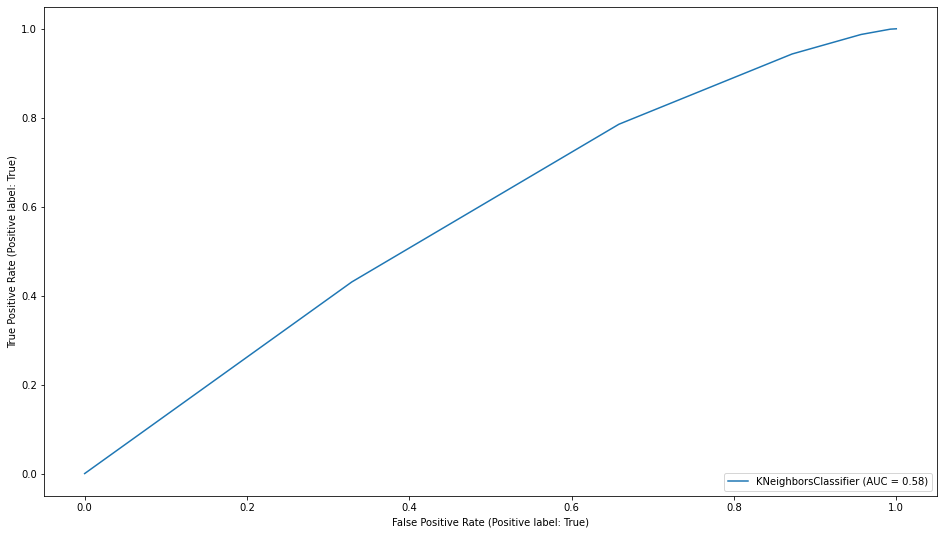

In [32]:
#remember becaus of the new data after imbalance adjustment, we use the following
X_train, X_dev, Y_train, Y_dev = train_test_split(X_train, y_train, test_size=0.20, random_state=0)

#importing module
from sklearn.neighbors import KNeighborsClassifier
#making the instance
knn = KNeighborsClassifier()
#learning
knn.fit(X_train,Y_train)
#Prediction
knnprediction=knn.predict(X_test)

evaluate_model (knn, X_test, y_test, knnprediction)

**Ada Boost**

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.8415032679738562
2. confusion_matrix:
[[ 144   76]
 [ 409 2431]]
3. recall_score:  0.8559859154929578
4. precision_score:  0.9696848823294775
5. f1_score:  0.9092949317374228
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


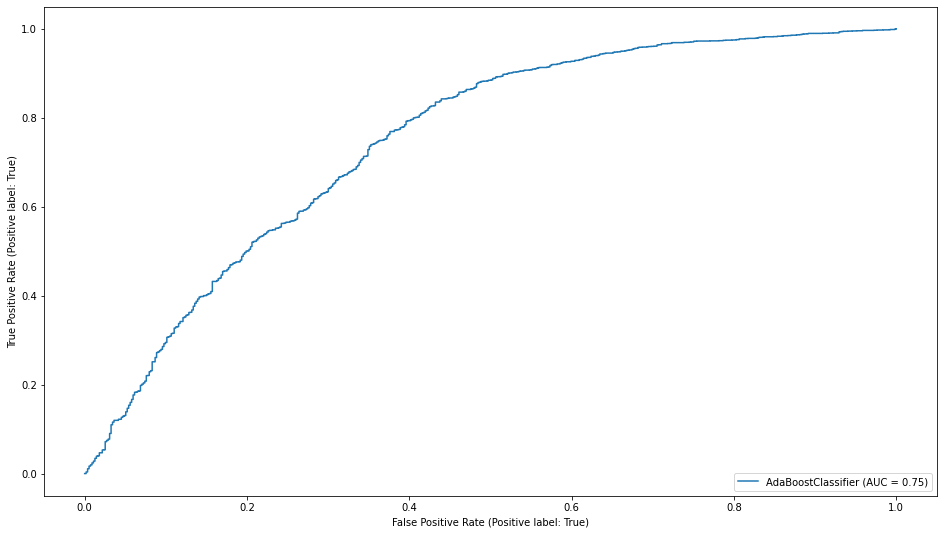

In [34]:
from sklearn.ensemble import AdaBoostClassifier

#remember becaus of the new data after imbalance adjustment, we use the following
X_train, X_dev, Y_train, Y_dev = train_test_split(X_train, y_train, test_size=0.20, random_state=0)

ada_model = AdaBoostClassifier(n_estimators=200, random_state=44)

#learning
ada_model.fit(X_train,Y_train)
#Prediction
ada_modelprediction=ada_model.predict(X_test)

evaluate_model (ada_model, X_test, y_test, ada_modelprediction)

**XGB Classifier**

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.846078431372549
2. confusion_matrix:
[[ 182  100]
 [ 371 2407]]
3. recall_score:  0.8664506839452844
4. precision_score:  0.9601116872756282
5. f1_score:  0.9108798486281929
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


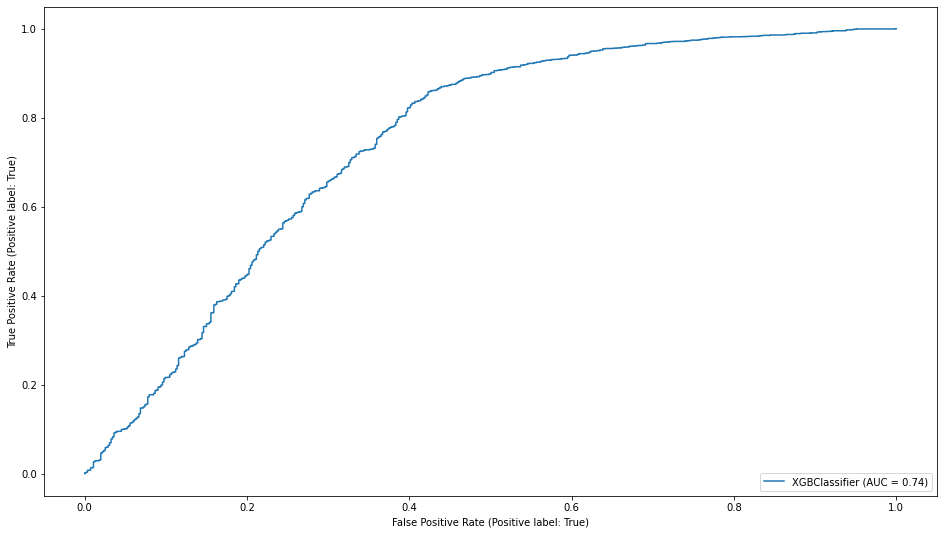

In [36]:
from xgboost import XGBClassifier

X_train, X_dev, Y_train, Y_dev = train_test_split(X_train, y_train, test_size=0.20, random_state=0)

XGB = XGBClassifier(objective='binary:logistic',scale_pos_weight=1,n_estimators=85, eta=0.3, subsample=1, colsample_bytree=1)

#learning
XGB.fit(X_train,Y_train)
#Prediction
XGB_modelprediction=XGB.predict(X_test)

evaluate_model (XGB, X_test, y_test, XGB_modelprediction)

**Light GBM**

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.3562091503267974
2. confusion_matrix:
[[ 496 1913]
 [  57  594]]
3. recall_score:  0.9124423963133641
4. precision_score:  0.23693657758276826
5. f1_score:  0.37618746041798606
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


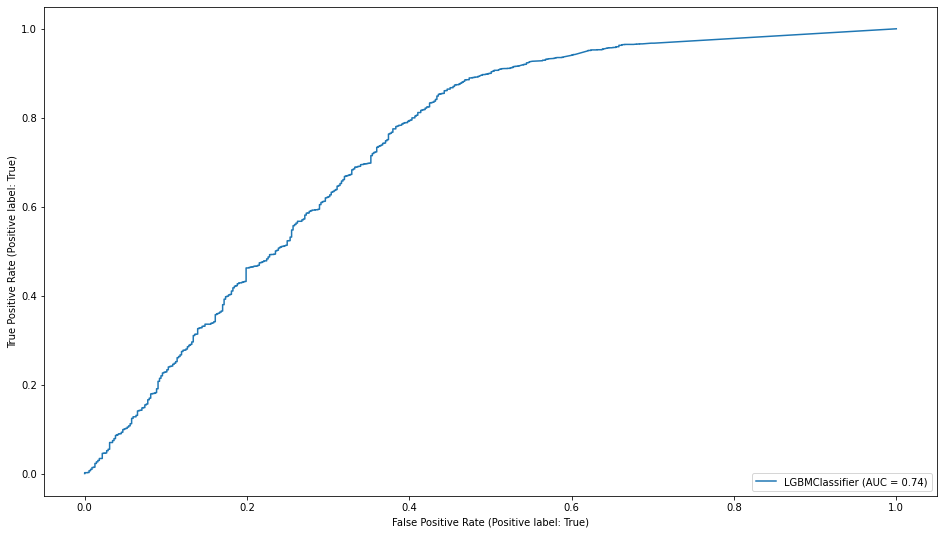

In [38]:
from lightgbm import LGBMClassifier

X_train, X_dev, Y_train, Y_dev = train_test_split(X_train, y_train, test_size=0.20, random_state=0)

lgbm_clf = LGBMClassifier(n_estimators=1000, objective='binary',
                          class_weight={0:25, 1:1}, learning_rate=0.01,
                          boosting_type='dart')
lgbm_clf.fit(X_train, Y_train)

#Prediction
LGBM_modelprediction=lgbm_clf.predict(X_test)

evaluate_model (lgbm_clf, X_test, y_test, LGBM_modelprediction)

**Votting Classifier**

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.8405228758169935
2. confusion_matrix:
[[ 185  120]
 [ 368 2387]]
3. recall_score:  0.8664246823956443
4. precision_score:  0.9521340247307539
5. f1_score:  0.9072595971113645
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


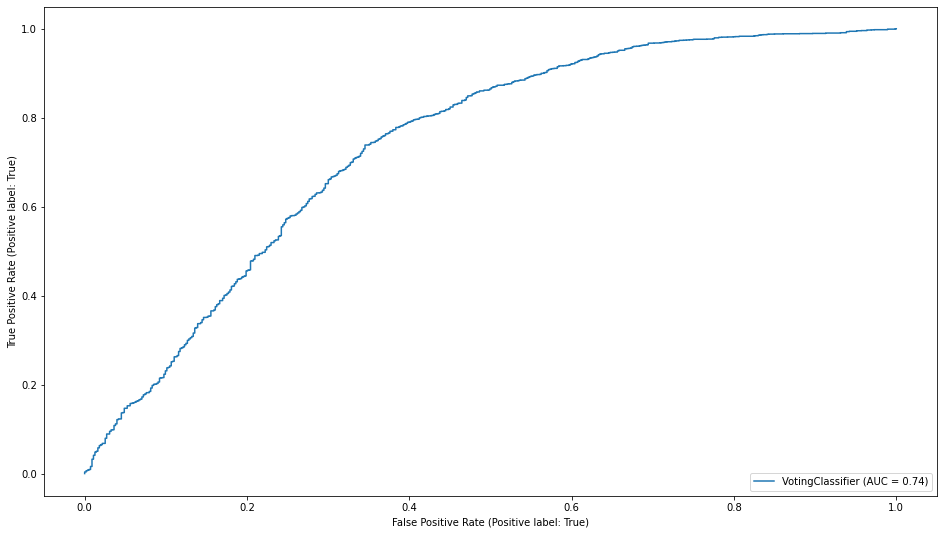

In [40]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, \
    ExtraTreesClassifier, VotingClassifier

clf1 = RandomForestClassifier(n_estimators=200, class_weight={0: 100, 1: 1})
clf2 = GradientBoostingClassifier(n_estimators=1000, max_depth=7)
clf3 = ExtraTreesClassifier(n_estimators=1000, class_weight={0: 100, 1: 1})
clf4 = XGBClassifier(n_estimators=1000, max_depth=5, learning_rate=0.01)
pos_clf = VotingClassifier(estimators=[('pos', clf1), ('gb', clf2),
                                        ('et', clf3), ('xgb', clf4)],
                            voting='soft',
                            weights=[1, 2, 1, 1])

pos_clf.fit(X_train, y_train)

#Prediction
Vot_modelprediction=pos_clf.predict(X_test)

evaluate_model (pos_clf, X_test, y_test, Vot_modelprediction)

**Gradient Boosting Classifier**

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.8277777777777777
2. confusion_matrix:
[[ 187  161]
 [ 366 2346]]
3. recall_score:  0.8650442477876106
4. precision_score:  0.9357798165137615
5. f1_score:  0.8990228013029316
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


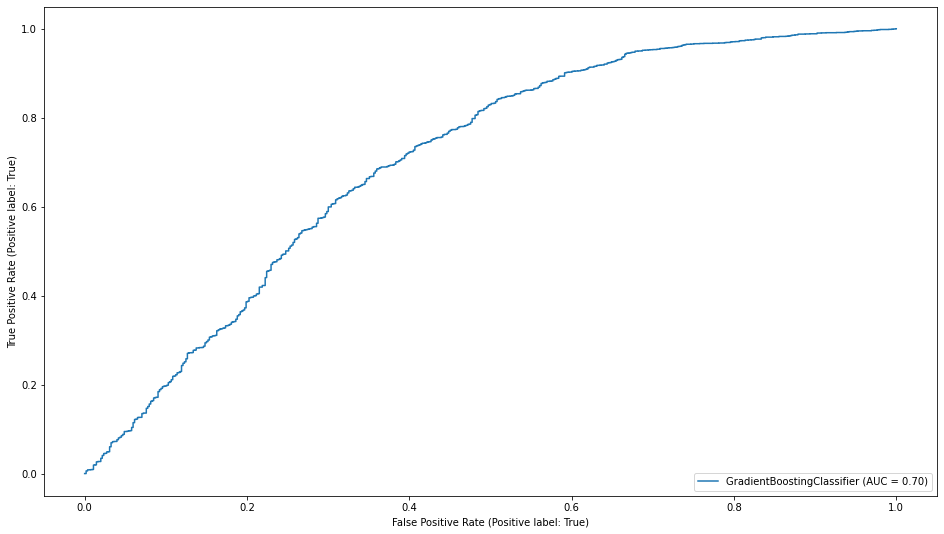

In [44]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, \
    ExtraTreesClassifier, VotingClassifier

GBoost = GradientBoostingClassifier(n_estimators=1000, max_depth=7)


GBoost.fit(X_train, y_train)

#Prediction
GBoost_modelprediction=GBoost.predict(X_test)

evaluate_model (GBoost, X_test, y_test, GBoost_modelprediction)

**Extra Trees Classifier**

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.8326797385620915
2. confusion_matrix:
[[ 133   92]
 [ 420 2415]]
3. recall_score:  0.8518518518518519
4. precision_score:  0.963302752293578
5. f1_score:  0.9041557469112692
6. Biểu đồ ROC của mô hình:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


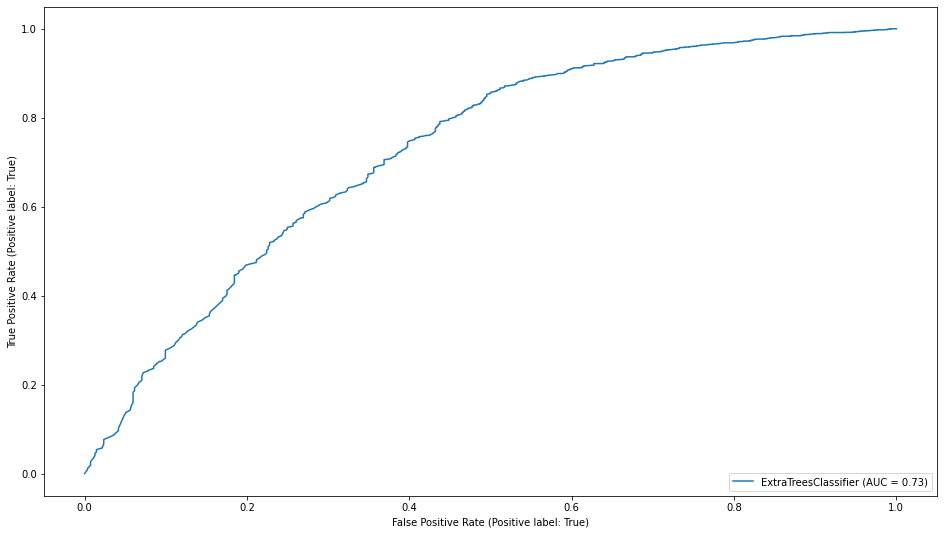

In [45]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, \
    ExtraTreesClassifier, VotingClassifier

Extra = ExtraTreesClassifier(n_estimators=1000, class_weight={0: 100, 1: 1})


Extra.fit(X_train, y_train)

#Prediction
Extra_modelprediction=Extra.predict(X_test)

evaluate_model (Extra, X_test, y_test, Extra_modelprediction)